In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline

In [ ]:
dataset = MNIST(root='data/', download=True, transform=ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 101712287.57it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 49747718.20it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 25786032.95it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 15388149.25it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
len(dataset)

60000

In [ ]:
dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
image, label = dataset[0]
print(image.shape)
image.permute(1,2,0).shape

torch.Size([1, 28, 28])


torch.Size([28, 28, 1])

image.shape: torch.Size([1, 28, 28])
Label: 5


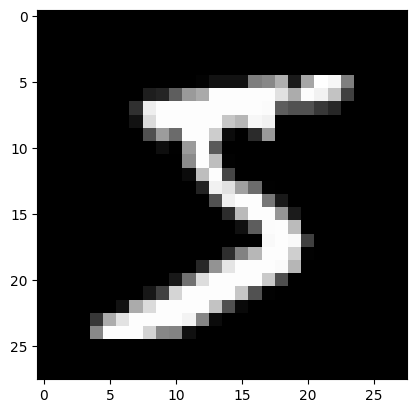

In [ ]:
image , label = dataset[0]
print('image.shape:', image.shape)
plt.imshow(image.permute(1,2,0), cmap='gray')
print('Label:', label)

In [ ]:
val_size = 10000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(50000, 10000)

In [ ]:
batch_size = 128

In [ ]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
for images, _ in train_loader:
  print('images.shape:', images.shape)
  print('grid.shape', make_grid(images, nrow=16).shape)
  break

images.shape: torch.Size([128, 1, 28, 28])
grid.shape torch.Size([3, 242, 482])


images.shape: torch.Size([128, 1, 28, 28])


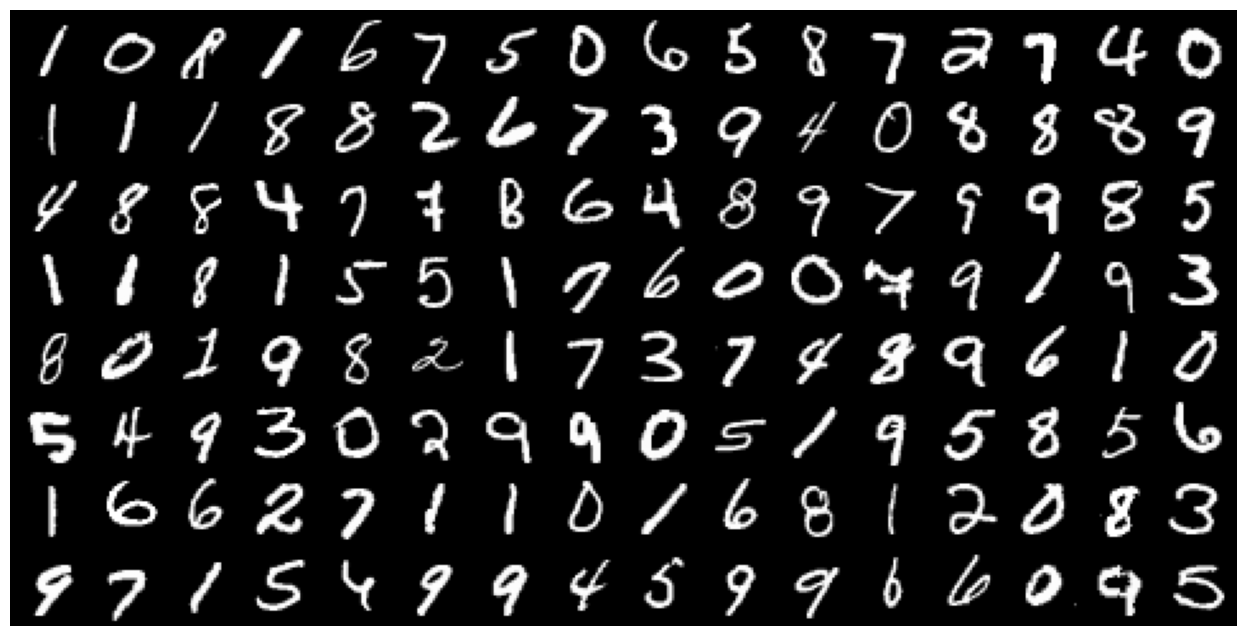

In [ ]:
for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

In [ ]:
for images, labels in train_loader:
  print('images.shape:', images.shape)
  inputs = images.reshape(-1, 784)
  print('inputs.shape:', inputs.shape)
  break

images.shape: torch.Size([128, 1, 28, 28])
inputs.shape: torch.Size([128, 784])


In [ ]:
input_size = inputs.shape[-1]
hidden_size = 32

In [ ]:
layer1 = nn.Linear(input_size, hidden_size)

In [ ]:
inputs.shape

torch.Size([128, 784])

In [ ]:
layer1_outputs = layer1(inputs)
print('layer1_outputs.shape:', layer1_outputs.shape)

layer1_outputs.shape: torch.Size([128, 32])


In [ ]:
layer1_outputs_direct = inputs @ layer1.weight.t() + layer1.bias
layer1_outputs_direct.shape

torch.Size([128, 32])

In [ ]:
torch.allclose(layer1_outputs, layer1_outputs_direct, 1e-3)

True

In [ ]:
F.relu(torch.tensor([[1,-1,0],
                     [-0.1,.2,3]]))

tensor([[1.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 3.0000]])

In [ ]:
relu_outputs = F.relu(layer1_outputs)
print('relu_outputs.shape', relu_outputs.shape)
print('min(layer1_outputs):', torch.min(layer1_outputs).item())
print('min(relu_outputs):',torch.min(relu_outputs).item())

relu_outputs.shape torch.Size([128, 32])
min(layer1_outputs): -0.8772488832473755
min(relu_outputs): 0.0


In [ ]:
output_size = 10
layer2 = nn.Linear(hidden_size, output_size)

In [ ]:
inputs.shape

torch.Size([128, 784])

In [ ]:
relu_outputs.shape

torch.Size([128, 32])

In [ ]:
layer2_outputs = layer2(relu_outputs)
print(layer2_outputs.shape)

torch.Size([128, 10])


In [ ]:
#Expanded version of layer2(F.relu(layer1(inputs)))
outputs = (F.relu(inputs @ layer1.weight.t() + layer1.bias)) @ layer2.weight.t() + layer2.bias

In [ ]:
torch.allclose(outputs, layer2_outputs, 1e-3)

True

In [ ]:
#Same as layer2(layer1(inputs))
outputs2 = (inputs @ layer1.weight.t() + layer1.bias) @ layer2.weight.t() + layer2.bias

In [ ]:
# Create a single layer to replace the two linear layers
combined_layer = nn.Linear(input_size, output_size)

combined_layer.weight.data = layer2.weight @ layer1.weight
combined_layer.bias.data = layer1.bias @ layer2.weight.t() + layer2.bias

In [ ]:
# Same as combined_layer(inputs)
outputs3 = inputs @ combined_layer.weight.t() + combined_layer.bias

In [ ]:
torch.allclose(outputs2, outputs3, 1e-3)

True

In [ ]:
class MnistModel(nn.Module):
    """Feedfoward neural network with 1 hidden layer"""
    def __init__(self, in_size, hidden_size, out_size):
        super().__init__()
        # hidden layer
        self.linear1 = nn.Linear(in_size, hidden_size)
        # output layer
        self.linear2 = nn.Linear(hidden_size, out_size)

    def forward(self, xb):
        # Flatten the image tensors
        xb = xb.view(xb.size(0), -1)
        # Get intermediate outputs using hidden layer
        out = self.linear1(xb)
        # Apply activation function
        out = F.relu(out)
        # Get predictions using output layer
        out = self.linear2(out)
        return out

    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))



In [ ]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds == labels).item()/len(preds))

In [ ]:
input_size = 784
hidden_size =32
num_classes = 10

In [ ]:
model = MnistModel(input_size, hidden_size= 32, out_size=num_classes)

In [ ]:
for t in model.parameters():
  print(t.shape)

torch.Size([32, 784])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


In [ ]:
for images, labels in train_loader:
    outputs = model(images)
    loss = F.cross_entropy(outputs, labels)
    print('Loss:', loss.item())
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

Loss: 2.3160760402679443
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.0668,  0.0046, -0.0391,  0.0595,  0.0166,  0.1348, -0.0885,  0.0079,
         -0.2016, -0.0554],
        [-0.0324,  0.1064,  0.0424,  0.0435,  0.0170,  0.1335, -0.2566,  0.0119,
         -0.3536,  0.0436]])


In [ ]:
torch.cuda.is_available()

True

In [ ]:
def get_default_device():
  """Pick GPU if available, else CPU"""
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    return torch.device('cpu')

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
def to_device(data, device):
  """ Move tensor(s) to chosen device"""
  if isinstance(data, (list, tuple)):
    return [to_device(x, device) for x in data]
  return data.to(device, non_blocking=True)

In [ ]:
for images, labels in train_loader:
  print(images.shape)
  print(image.device)
  images = to_device(images, device)
  print(images.device)
  break

torch.Size([128, 1, 28, 28])
cpu
cuda:0


In [ ]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
def some_numbers():
  yield 10
  yield 20
  yield 30

for value in some_numbers():
  print(value)

10
20
30


In [ ]:
train_loader = DeviceDataLoader(train_loader,device)
val_loader = DeviceDataLoader(val_loader, device)

In [ ]:
for xb, yb in val_loader:
  print('xb.device:', xb.device)
  print('yb:', yb)
  break

xb.device: cuda:0
yb: tensor([9, 0, 9, 2, 6, 7, 1, 9, 1, 9, 8, 4, 4, 9, 3, 9, 4, 0, 5, 8, 8, 7, 9, 6,
        6, 9, 1, 8, 6, 1, 9, 1, 8, 3, 1, 8, 9, 6, 2, 6, 1, 1, 5, 2, 8, 3, 1, 3,
        7, 9, 7, 5, 5, 5, 7, 0, 2, 9, 6, 9, 5, 9, 8, 5, 0, 6, 9, 0, 3, 9, 6, 3,
        1, 5, 3, 9, 5, 4, 3, 2, 7, 6, 6, 2, 5, 4, 7, 3, 2, 7, 9, 0, 8, 0, 4, 9,
        2, 1, 8, 1, 8, 8, 6, 8, 5, 7, 8, 3, 7, 4, 1, 2, 2, 2, 5, 0, 8, 4, 4, 4,
        5, 0, 0, 0, 7, 8, 6, 6, 7, 9, 5, 0, 0, 6, 8, 3, 4, 0, 5, 3, 9, 3, 7, 4,
        2, 7, 5, 1, 1, 2, 5, 1, 9, 6, 4, 5, 4, 3, 7, 6, 2, 6, 7, 0, 5, 1, 2, 0,
        1, 9, 7, 0, 9, 6, 8, 7, 3, 3, 0, 2, 5, 6, 0, 9, 8, 4, 6, 2, 8, 1, 9, 5,
        1, 9, 6, 3, 9, 0, 8, 6, 0, 9, 7, 6, 2, 1, 9, 7, 5, 0, 6, 1, 2, 8, 6, 6,
        3, 5, 6, 3, 0, 7, 7, 7, 2, 6, 6, 5, 3, 4, 3, 2, 6, 0, 8, 4, 1, 1, 8, 6,
        7, 8, 2, 8, 2, 0, 8, 9, 5, 6, 0, 9, 4, 6, 7, 5], device='cuda:0')


In [ ]:
def evaluate(model, val_loader):
    """Evaluate the model's performance on the validation set"""
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    """Train the model using gradient descent"""
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
# Model (on GPU)
model = MnistModel(input_size, hidden_size=hidden_size, out_size=num_classes)
to_device(model, device)

MnistModel(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

In [ ]:
history = [evaluate(model, val_loader)]
history

[{'val_loss': 2.299565315246582, 'val_acc': 0.10576172173023224}]

In [ ]:
history += fit(5, 0.5, model, train_loader, val_loader)

Epoch [0], val_loss: 0.2349, val_acc: 0.9292
Epoch [1], val_loss: 0.2109, val_acc: 0.9364
Epoch [2], val_loss: 0.1554, val_acc: 0.9535
Epoch [3], val_loss: 0.1457, val_acc: 0.9577
Epoch [4], val_loss: 0.1217, val_acc: 0.9624


In [ ]:
history += fit(5, 0.1, model, train_loader, val_loader)

Epoch [0], val_loss: 0.1132, val_acc: 0.9651
Epoch [1], val_loss: 0.1120, val_acc: 0.9656
Epoch [2], val_loss: 0.1128, val_acc: 0.9663
Epoch [3], val_loss: 0.1131, val_acc: 0.9665
Epoch [4], val_loss: 0.1106, val_acc: 0.9678


In [ ]:
history += fit(5, 0.01, model, train_loader, val_loader)

Epoch [0], val_loss: 0.1096, val_acc: 0.9676
Epoch [1], val_loss: 0.1090, val_acc: 0.9673
Epoch [2], val_loss: 0.1089, val_acc: 0.9680
Epoch [3], val_loss: 0.1090, val_acc: 0.9676
Epoch [4], val_loss: 0.1090, val_acc: 0.9674


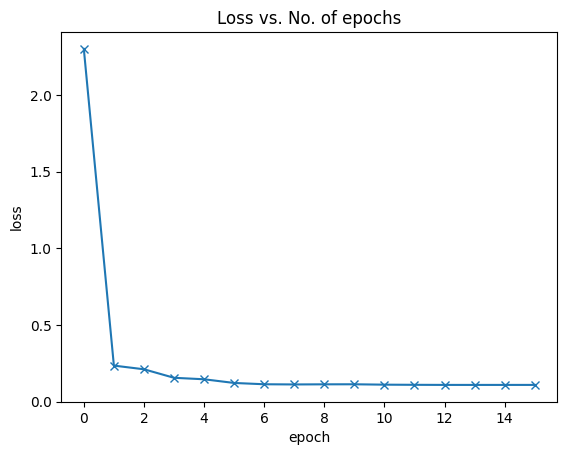

In [ ]:
losses = [x['val_loss'] for x in history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs');

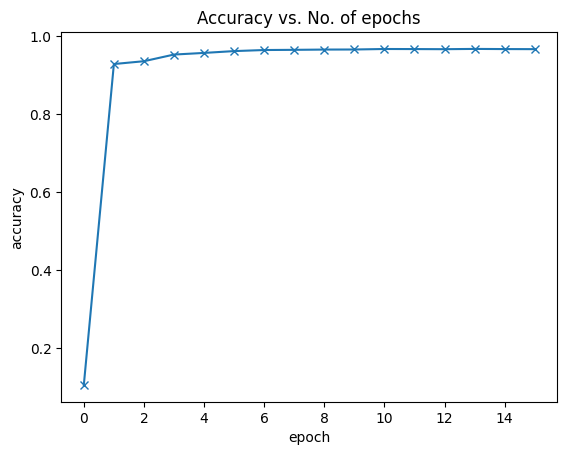

In [ ]:
accuracies = [x['val_acc'] for x in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [ ]:
# Define test dataset
test_dataset = MNIST(root='data/',
                     train=False,
                     transform=ToTensor())

In [ ]:
def predict_image(img, model):
  xb = to_device(img.unsqueeze(0), device)
  yb = model(xb)
  _, preds = torch.max(yb, dim=1)
  return preds[0].item()

Label: 7 ,predicted: 7


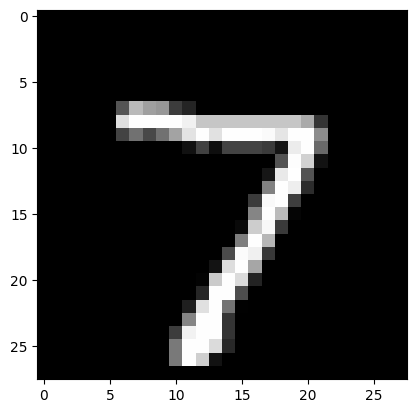

In [ ]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:',label, ',predicted:',predict_image(img, model))

Label: 2 ,predicted: 2


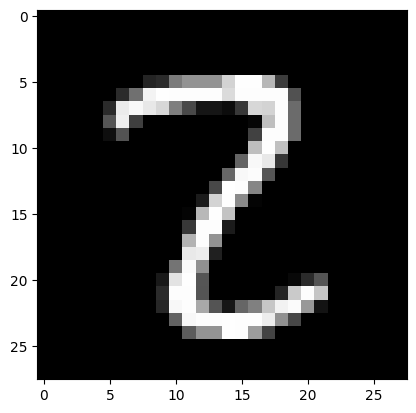

In [ ]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:',label, ',predicted:',predict_image(img, model))

Label: 9 ,predicted: 9


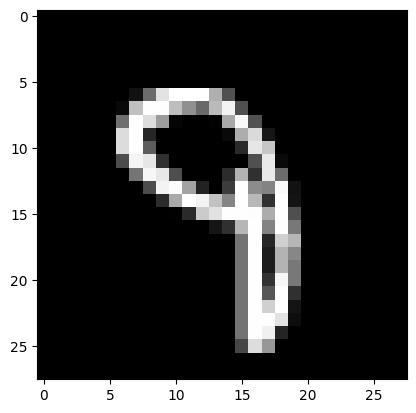

In [ ]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:',label, ',predicted:',predict_image(img, model))

In [ ]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size=256), device)
result = evaluate(model, test_loader)
result

{'val_loss': 0.10370444506406784, 'val_acc': 0.9697265625}

In [ ]:
torch.save(model.state_dict(), 'minist-feedforward.pth')